<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-Python/blob/main/ISOTHERMAL_CONTINUOUS_STIRRED_TANK_CHEMICAL_REACTORS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title: ISOTHERMAL CONTINUOUS STIRRED TANK CHEMICAL REACTORS

Name: Juan Manuel G.G

Date: February 2021

## Objetives

* Determine the steady-state behavior of an isothermal CSTR (number of steady-states)

* Determine the stability of a particular steady-state

* Find the state-space and transfer function form of a linearized CSTR model at a particular steady-state

* Show that steady-state gains calculated from the steady-state equations are consistent with the transfer funcion gains 

## Introduction 

Chemical reactors arc generally the most important unit operations in a chemical plant. Chemical reactors come in many forms, but two of the most common idealizations are the continuous stirred tank reactor (CSTR) and the plug flow reactor (PFR). These two types serve as limiting hounds for the behavior of many operating reactors. The CSTR is often used in dynamic modeling studies, because it can be modeled as a lumped parameter system. A dynamic model of a plug flow reactor consists of partial differential equations (also know as a distributed parameter system)

In this module we will assume that the reactor is operating at a constant temperature (it is isothermal), so we do not need an energy balance (and can also assume that the reaction rate parameters are constant). In addition, we will assume that the volume is constant.




## First-order irreversible reaction 

### 1. Process description 

Consider a single irreversible reaction A $\rightarrow$ B. Assume that the rate of reaction per unit volume is first-order with respect to the concentration of A:

$$
\text{molar rate of reaction of A per unit volume} =  r_A = kC_A
$$

Each mole of A reacted creates a mole of B, so we have the following relationship for the rate of formation of B:

$$
\text{molar rate of formation of B per unit volume} = r_B = kC_A
$$

### 2. Assumptions 

* Constant volume

* Constant temperature 

* Perfect mixing 

* Constant kinetic parameters 

### 3. Establish the model 

Component material balance on A

$$
\text{rate of accumulation = in by flow - out by flow - out by reaction} 
$$

$$
\frac{d(VC_A)}{dt} = F C_{Af} -FC_A - V_ k C_A
$$

where $k$ is the reaction rate constant. Since $V$ is constant:

$$
\frac{dC_A}{dt} = \frac{F}{A}C_{Af} - \frac{F}{V}C_A - k C_A
$$

which we can write as:

$$
\frac{dC_A}{dt} = \frac{F}{V}C_{Af} - \left(\frac{F}{V} + k\right)C_A \tag{1}
$$

Component material balance on B

It is natural to assume that there is no B in the feedstream, which yields the following modeling equation:

$$
\frac{d(VC_B)}{dt} = -FC_B + V k C_A
$$

where again, k is the reaction rate constant. Since $V$ is constant

$$
\frac{dC_B}{dt} = - \frac{F}{V}C_B + k C_A \tag{2}
$$

### Steady-State Behavior 

$$
C_{As} = \frac{\frac{F_s}{V}C_{Af}}{\frac{F_s}{V} + k} \tag{3}
$$

$$
\frac{\partial C_{As}}{\partial \frac{F_s}{V}} = \frac{kC_{Afs}}{ \left(\frac{kV}{F_s} + k\right)^2} \tag{4}
$$

$$
\frac{\partial C_{As}}{\partial C_{Afs}} = \frac{\frac{kV}{F_s}}{\frac{kV}{F_s} + 1} \tag{5}
$$


In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint 

In [2]:
def Ca_Caf(D):

    Ca_Caf = D/(D + k)
    Cb_Caf = 1 - Ca_Caf

    return [Ca_Caf, Cb_Caf]

In [3]:
k = 0.2
D = np.linspace(0,10,100)
Conc = Ca_Caf(D)

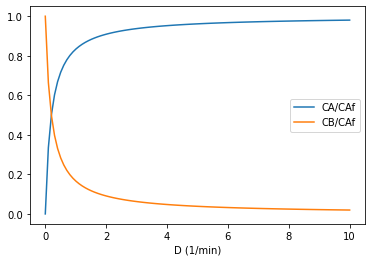

In [4]:
plt.plot(D, Conc[0], D, Conc[1])
plt.xlabel("D (1/min)")
plt.legend(["CA/CAf","CB/CAf"])

Figure 1. Dimensionless concentration of A and B as a function of D

### Dynamic Behavior

The state space model (by linearizing (1) and (2)) is then:

$$
\frac{dx_1}{dt} = - \left(\frac{F_s}{V} + k\right)x_1 + (C_{Afs} - C_{As})u_1 + \frac{F_s}{V}u_2 \tag{6}
$$

$$
\frac{dx_2}{dt} = kx_1 + \left(-\frac{F_s}{V}\right)x_2 - C_{Bs}u_1 \tag{7}
$$

### Numerical example 

Consider a system with the following parameters and steady-state values:

$$\frac{F_s}{V} = D = 0.2\ \text{min}^{-1}$$

$$k = 0.2\ \text{min}^{-1}$$

$$C_{Afs} = 1.0\ \frac{\text{gmol}}{\text{liter}}$$

which yields the following state-space model:

$$
\begin{bmatrix}
\frac{dx_1}{dt}  \\
\frac{dx_2}{dt}  
\end{bmatrix} = 

\begin{bmatrix}
-0.4 & 0 \\
0.2 & -0.2
\end{bmatrix}

\begin{bmatrix}
x_1  \\
x_2  
\end{bmatrix}

+

\begin{bmatrix}
0.5 & 0.2 \\
-0.5 & 0 
\end{bmatrix}

\begin{bmatrix}
u_1  \\
u_2  
\end{bmatrix}
$$

In [5]:
# write dynamic model 
def reactor(s,t,u):

    # state variables
    ## nonlinear model 
    ca = s[0]
    cb = s[1]
    ## linear model
    cal = s[2]
    cbl = s[3]

    # inputs
    D = u[0]
    caf = u[1]

    # prameters
    # k (1/min)
    
    ## nonlinear 
    dcadt = D*(caf - ca) - k*ca
    dcbdt = - D*cb + k*ca
    ## linear 
    dcaldt = -0.4*(cal - cas) + 0.5*(D - Ds) + 0.2*(caf - cafs)
    dcbldt = 0.2*(cal - cas) - 0.2*(cbl - cbs) - 0.5*(D - Ds)

    return [dcadt, dcbdt, dcaldt, dcbldt]

In [6]:
# nominal values 
## inputs
Ds = 0.2 # 1/min
cafs = 1.0 # gmol/min
## parameter
k = 0.2 # 1/min

In [7]:
# steady state concentration 
Ca_Caf(Ds)

[0.5, 0.5]

In [8]:
cas = 0.5*cafs
cbs = 0.5*cafs

In [9]:
# initial conditions 
s = [0.5, 0.5, 0.5, 0.5]

In [10]:
# integration time 
time = np.linspace(0,20,100)

#### Simulate with constant inputs

In [11]:
u = [Ds+0.01, cafs]
out = odeint(reactor, s, time, args=(u,))
ca = out[:,0]
cb = out[:,1]
cal = out[:,2]
cbl = out[:,3]

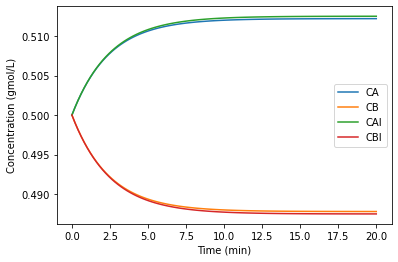

In [12]:
plt.plot(time, ca,time, cb,time, cal,time, cbl)
plt.xlabel("Time (min)")
plt.ylabel("Concentration (gmol/L)")
plt.legend(["CA","CB","CAl","CBl"])

In [13]:
# establish inputs 
D = np.ones(len(time))*Ds + 0.2 # small step change in D
caf = np.ones(len(time))*cafs

In [14]:
# vectors to save states 
ca = np.ones(len(time))*s[0]
cb = np.ones(len(time))*s[0]
cal = np.ones(len(time))*s[1]
cbl = np.ones(len(time))*s[1]


In [15]:
s = [0.5,0.5,0.5,0.5] # reset initial conditions 
# for cycle to simulate with different inputs 
for i in range(len(time)-1):

    # update time span 
    ts = [time[i], time[i+1]]

    # update inputs
    u = [D[i+1], caf[i+1]]

    # solve ODEs
    out = odeint(reactor, s, ts, args=(u,))

    # save states
    ca[i+1] = out[-1][0]
    cb[i+1] = out[-1][1]
    cal[i+1] = out[-1][2]
    cbl[i+1] = out[-1][3]

    # update initial conditions 
    s = out[-1]

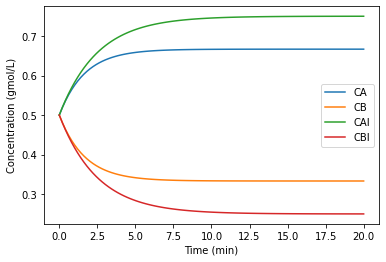

In [16]:
plt.plot(time, ca,time, cb,time, cal,time, cbl)
plt.xlabel("Time (min)")
plt.ylabel("Concentration (gmol/L)")
plt.legend(["CA","CB","CAl","CBl"])

In [17]:
A = np.matrix([[-0.4, 0], [0.2, -0.2]])

In [18]:
eigenval, eigenvect = np.linalg.eig(A)

In [19]:
print("eigenvalues:", eigenval)

eigenvalues: [-0.2 -0.4]


In [20]:
print("eigenvectors:")
print(eigenvect)

eigenvectors:
[[ 0.          0.70710678]
 [ 1.         -0.70710678]]


These results indicate that an initial perturbation in the second state variable (concentration of B) will respond slowly, while an equal magnitude pertubation in both state variables will respond twice as fast.

### Van De Vusse Reaction 

Often reaction shceme will exhibit a maximun in the concentration of product versus flowrate curve. Here we will consider such a reaction. It turns out that this type of system can have significantly different input/output characteristics, depending on the operating condition chosen. Consider the reaction scheme consisting of the following irreversible reactions: 

$$A \rightarrow B \rightarrow C$$

$$ 2A \rightarrow D $$

### Modeling equations 

Overall Material Balance

Assuming constant density and cosntant volume:

$$
\frac{dV}{dt} = 0 \hspace{1cm} \text{and} \hspace{1cm} F = F_i
$$

Component A Balance

the balance on A is:

$$
\text{accumulation = in by flow - out by flow - out by reaction 1 - out by reaction 2}
$$

$$
\frac{d(VC_A)}{dt} = F(C_{Af} - C_A) - Vk_1C_A - Vk_3C_A^2 
$$

Since V is constant: 

$$
\frac{dC_A}{dt} = \frac{F}{V}(C_{Af} - C_A) - k_1C_A - k_3C_A^2 \tag{8}
$$

Component B Balance

Similarly, we can write:

$$
\frac{dC_B}{dt} = - \frac{F}{V}C_B + k_1C_A - k_2C_B \tag{9}
$$

Component C Balance

Also, for component C:

$$
\frac{dC_c}{dt} = - \frac{F}{V}C_c + k_2 C_B \tag{10}
$$

Component D Balance 

$$
\frac{dC_D}{dt} = - \frac{F}{V}C_D + \frac{1}{2}k_3C_A^{2} \tag{11}
$$


### Steady state 

Solving for (1) and (2) we find a quadratic equation in C_{As}:

In [21]:
import sympy as sp 

In [22]:
F, V, Caf, Ca, k1, k3, Cb, k2 = sp.symbols("F, V, Caf, Ca, k1, k3, Cb, k2") 

In [23]:
eq1 = sp.Eq(F/V*(Caf - Ca) - k1*Ca - k3*Ca**2,0)
eq2 = sp.Eq(-F/V*Cb + k1*Ca - k2*Cb,0)

In [24]:
sp.solve(eq1, Ca)

[(-F - V*k1 + sqrt(4*Caf*F*V*k3 + F**2 + 2*F*V*k1 + V**2*k1**2))/(2*V*k3),
 -(F + V*k1 + sqrt(4*Caf*F*V*k3 + F**2 + 2*F*V*k1 + V**2*k1**2))/(2*V*k3)]

In [25]:
sp.solve(eq2, Cb)

[Ca*V*k1/(F + V*k2)]

$$
C_{As} = \frac{-F - Vk_1 + \sqrt{4C_{Af}FVk_3 + F^2 + 2FVk_1 + V^2k_1^2}}{2Vk_3} 
$$

$$
C_{As} = \frac{- (k_1 + \frac{F_s}{V}) + \sqrt{(k_1 + \frac{F_s}{V})^2 + 4k_3C_{Afs}(\frac{F_s}{V})}}{2k_3} \tag{12}
$$

\\
$$
C_{Bs} = \frac{k_1C_{As}}{\frac{F_s}{V} +  k_2} \tag{13}
$$

In [108]:
# parameter values
k1 = 0.8333
k2 = 1.666
k3 = 1.666
cafs = 3.0

In [109]:
def steady_state(D):

    cas = (-(k1 + D) + np.sqrt((k1 + D)**2 + 4*k3*cafs*D))/(2*k3)

    cbs = k1*cas/(D + k2)

    return [cas, cbs]

In [90]:
D = np.linspace(0,10,100)
ss = steady_state(D)

Text(0, 0.5, 'CBs')

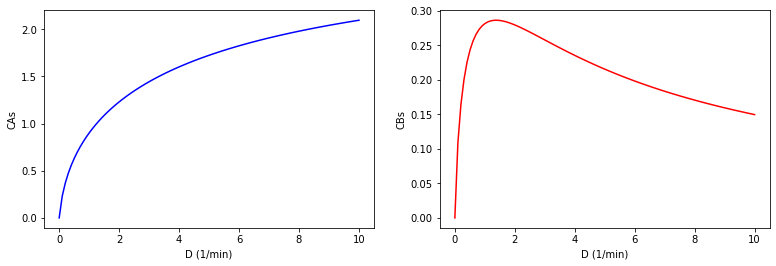

In [91]:
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
plt.plot(D, ss[0], "b")
plt.xlabel("D (1/min)")
plt.ylabel("CAs")
plt.subplot(1,2,2)
plt.plot(D, ss[1], "r")
plt.xlabel("D (1/min)")
plt.ylabel("CBs")

It seems like there are a maximun of $C_{Bs}$ in $D$ = 1.2 (1/min)

### State Space Model 

Here we linearize the nonlinear modeling equations to find the state-space form:

$$
\mathbf{\dot{x} = A x + Bu} 
$$

$$
\mathbf{y = Cx}
$$

where the state, input, and output vectors are, in deviation form:

$$
\mathbf{x} = 

\begin{bmatrix}
C_A - C_{As}\\
C_B - C_{Bs}
\end{bmatrix} =

\text{state variables}

$$

$$

\mathbf{u} = 

\begin{bmatrix}
\frac{F}{V} - \frac{F_s}{V}\\
\end{bmatrix} =

\text{input variable}
$$

$$
\mathbf{y} = 

\begin{bmatrix}
C_A - C_{As}\\
C_B - C_{Bs}
\end{bmatrix} =

\text{output variables}
$$

Recall that our two dynamical functional equations are:

$$
\frac{dC_A}{dt} = f_1\left(C_A, C_B, \frac{F}{V}\right) = \frac{F}{V}(C_{Af} - C_A)- k_1C_A - k_3C_A^2
$$

$$
\frac{dC_B}{dt} = f_2\left(C_A, C_B, \frac{F}{V}\right) = - \frac{F}{V}C_B + k_1C_A - k_2C_B
$$

The elements of the state-apece A matrix are found by: $A_{ij} = \partial f_i/\partial x_j$

and the state-aspace model is: 

$$
A = 

\begin{bmatrix}
-\frac{F_s}{V} - k_1 - 2k_3C_{As} & 0 \\
k_1 & -\frac{F_s}{V} - k_2
\end{bmatrix}
$$

$$
B = 

\begin{bmatrix}
C_{Afs} - C_{As} \\
-C_{Bs}
\end{bmatrix}
$$

### Operating at the peak 

The optimum operating point for the production of B is at the following dilution rate:

$$
\frac{F_s}{V} = 1.291\ \text{min}^{-1} 
$$

which yields the composition:

$$
C_{As} = 4.4949 \frac{\text{mol}}{\text{liter}} \hspace{1cm} C_{Bs} = 1.2660 \frac{\text{mol}}{\text{liter}}
$$

and the state-space model:

$$
A = 

\begin{bmatrix}
-3.6237 & 0 \\
0.8333 & -2.9588
\end{bmatrix}
$$

$$
B =

\begin{bmatrix}
5.5051\\
-1.2660
\end{bmatrix}
$$

In [110]:
# parameters values 
k1 = 0.8333
k2 = 1.666
k3 = 1.666
cafs = 3.0
# nominal values
Ds = 1.291
ss = steady_state(Ds)
cas = s[0]
cbs = s[1]
print("CAs: ",ss[0])
print("CBs:",ss[1])

CAs:  1.0150872889330274
CBs: 0.28605757114233743


### Liner vs Nonlinear

In [102]:
# write the model 
def reactor2(s,t,u):

    # state variables
    ## nonlinear
    ca = s[0]
    cb = s[1]
    ## linear
    cal = s[2]
    cbl = s[3]

    # inputs
    D = u[0]
    caf = u[1]

    # parameters
    # k1, k2, k3 (1/min)
    
    ## nonlinear 
    dcadt = D*(caf - ca) - k1*ca - k3*ca**2
    dcbdt = - D*cb + k1*ca - k2*cb
    ## linear 
    dcaldt = -12.1203*(cal-cas) + 1.985*(D - Ds)
    dcbldt = 0.8333*(cal - cas) - 2.957*(cbl - cbs) - 0.2860*(D - Ds)

    return [dcadt, dcbdt, dcaldt, dcbldt]

In [103]:
# integration time 
time = np.linspace(0,5,100)

In [123]:
# inputs 
D = np.ones(len(time))*Ds + 0.1
caf = np.ones(len(time))*cafs

In [124]:
# vectors to save states 
ca = np.ones(len(time))*cas
cb = np.ones(len(time))*cbs
cal = np.ones(len(time))*cas
cbl = np.ones(len(time))*cbs

In [125]:
# initial conditions
s = [cas, cbs, cas, cbs]
# for cycle to simulate using different input values 
for i in range(len(time)-1):
    # update time span 
    ts = [time[i], time[i+1]]
    # update inputs
    u = [D[i+1],caf[i+1]]
    # solve ODEs
    out = odeint(reactor2,s,ts,args=(u,))
    # save states
    ca[i+1] = out[-1][0]
    cb[i+1] = out[-1][1]
    cal[i+1] = out[-1][2]
    cbl[i+1] = out[-1][3]
    # update initial conditions 
    s = out[-1]

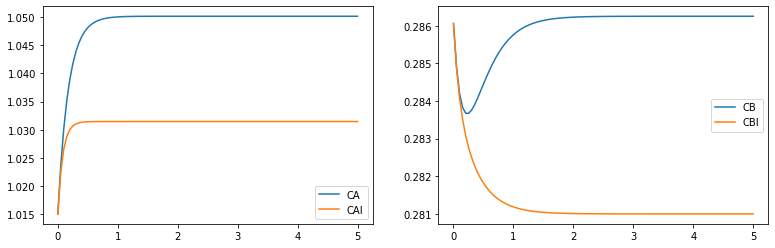

In [127]:
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
plt.plot(time,ca,time,cal)
plt.legend(["CA","CAl"])
#plt.ylim([0.25,1.1])
plt.subplot(1,2,2)
plt.plot(time,cb,time,cbl)
plt.legend(["CB","CBl"])
#plt.ylim([0.25,1.1])